In [117]:
import pandas as pd
import json
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("dialog_level_taaco_reformatted.csv")
df.sample(1)

,Filename,text,token_length,TAACO_metrics
16446,dialog_06643.txt,"B:: Yeah.\nA:: We had our, our, fact about, uh...",31,"{'noun_ttr': 0.7, 'verb_ttr': 1.0, 'adj_ttr': ..."


In [119]:
keys = list(json.loads(df.TAACO_metrics[0].replace("\'", "\"")).keys())
metrics = {k: [] for k in keys}

for row in df.TAACO_metrics:
    row = row.replace("\'", "\"")
    row = json.loads(row)

    for k in row.keys():
        metrics[k].append(row[k])

In [120]:
means = {k: np.mean(metrics[k]) for k in keys}
stds = {k: np.std(metrics[k]) for k in keys}

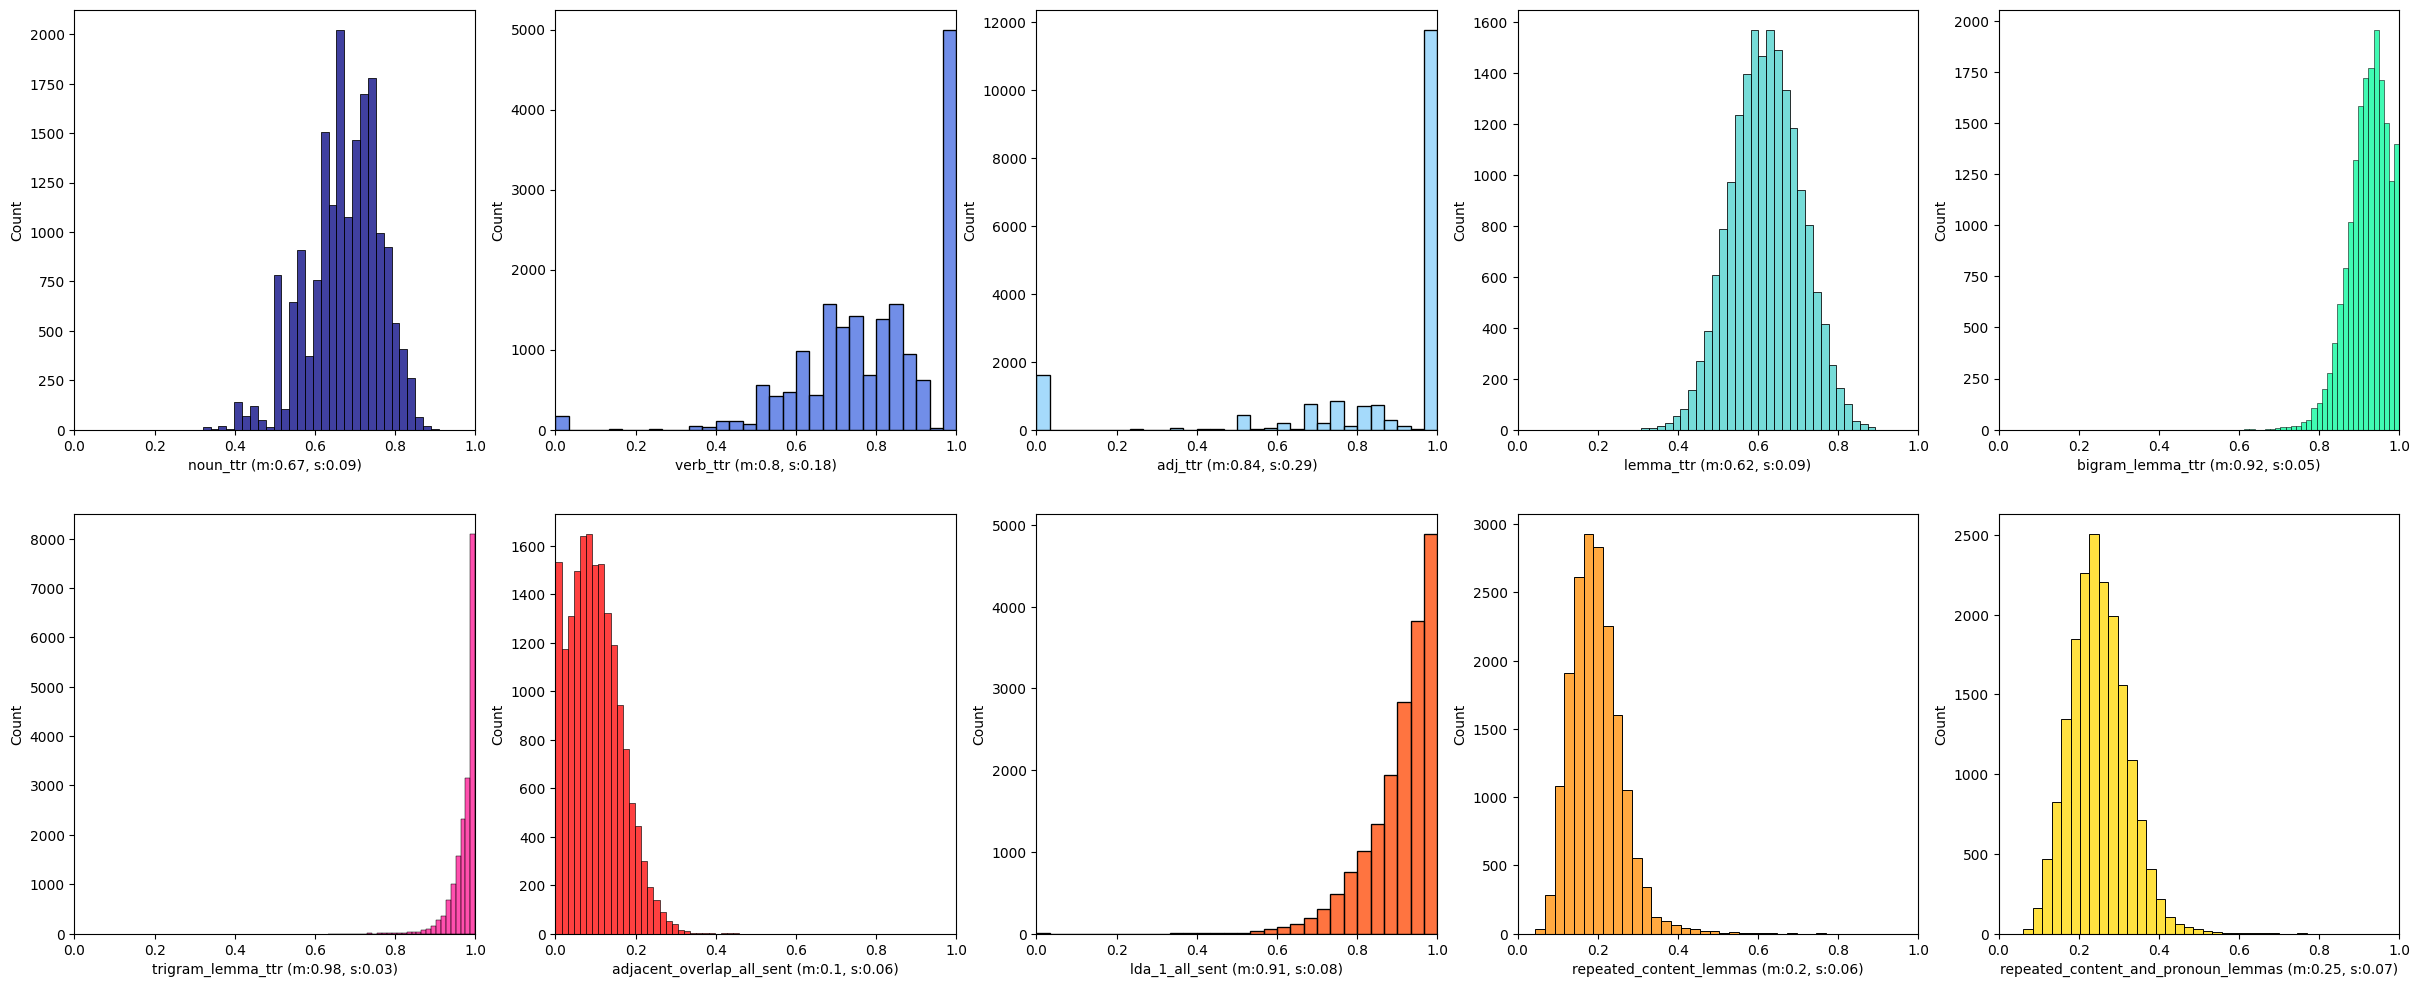

In [130]:
colors = ['navy', 'royalblue', 'lightskyblue', 'mediumturquoise', 'mediumspringgreen', 'deeppink', 'red', 'orangered', 'darkorange', 'gold']

fig, axes = plt.subplots(2, 5, figsize=(30, 12))
i = 0
j = 0
for ind in range(len(keys)):
    if ind == 5:
        i = 1

    axes[i, j].set_xlim(left=0, right=1)
    sns.histplot(metrics[keys[ind]], bins=30, ax=axes[i, j], color=colors[ind])
    m = np.round(means[keys[ind]],2)
    s = np.round(stds[keys[ind]],2)
    axes[i, j].set_xlabel(f'{keys[ind]} (m:{m}, s:{s})')
    j = (j+1)%5

plt.show()

In [131]:
for key in keys:
    for i in range(len(metrics[key])):
        metrics[key][i] = (metrics[key][i] - means[key]) / stds[key]

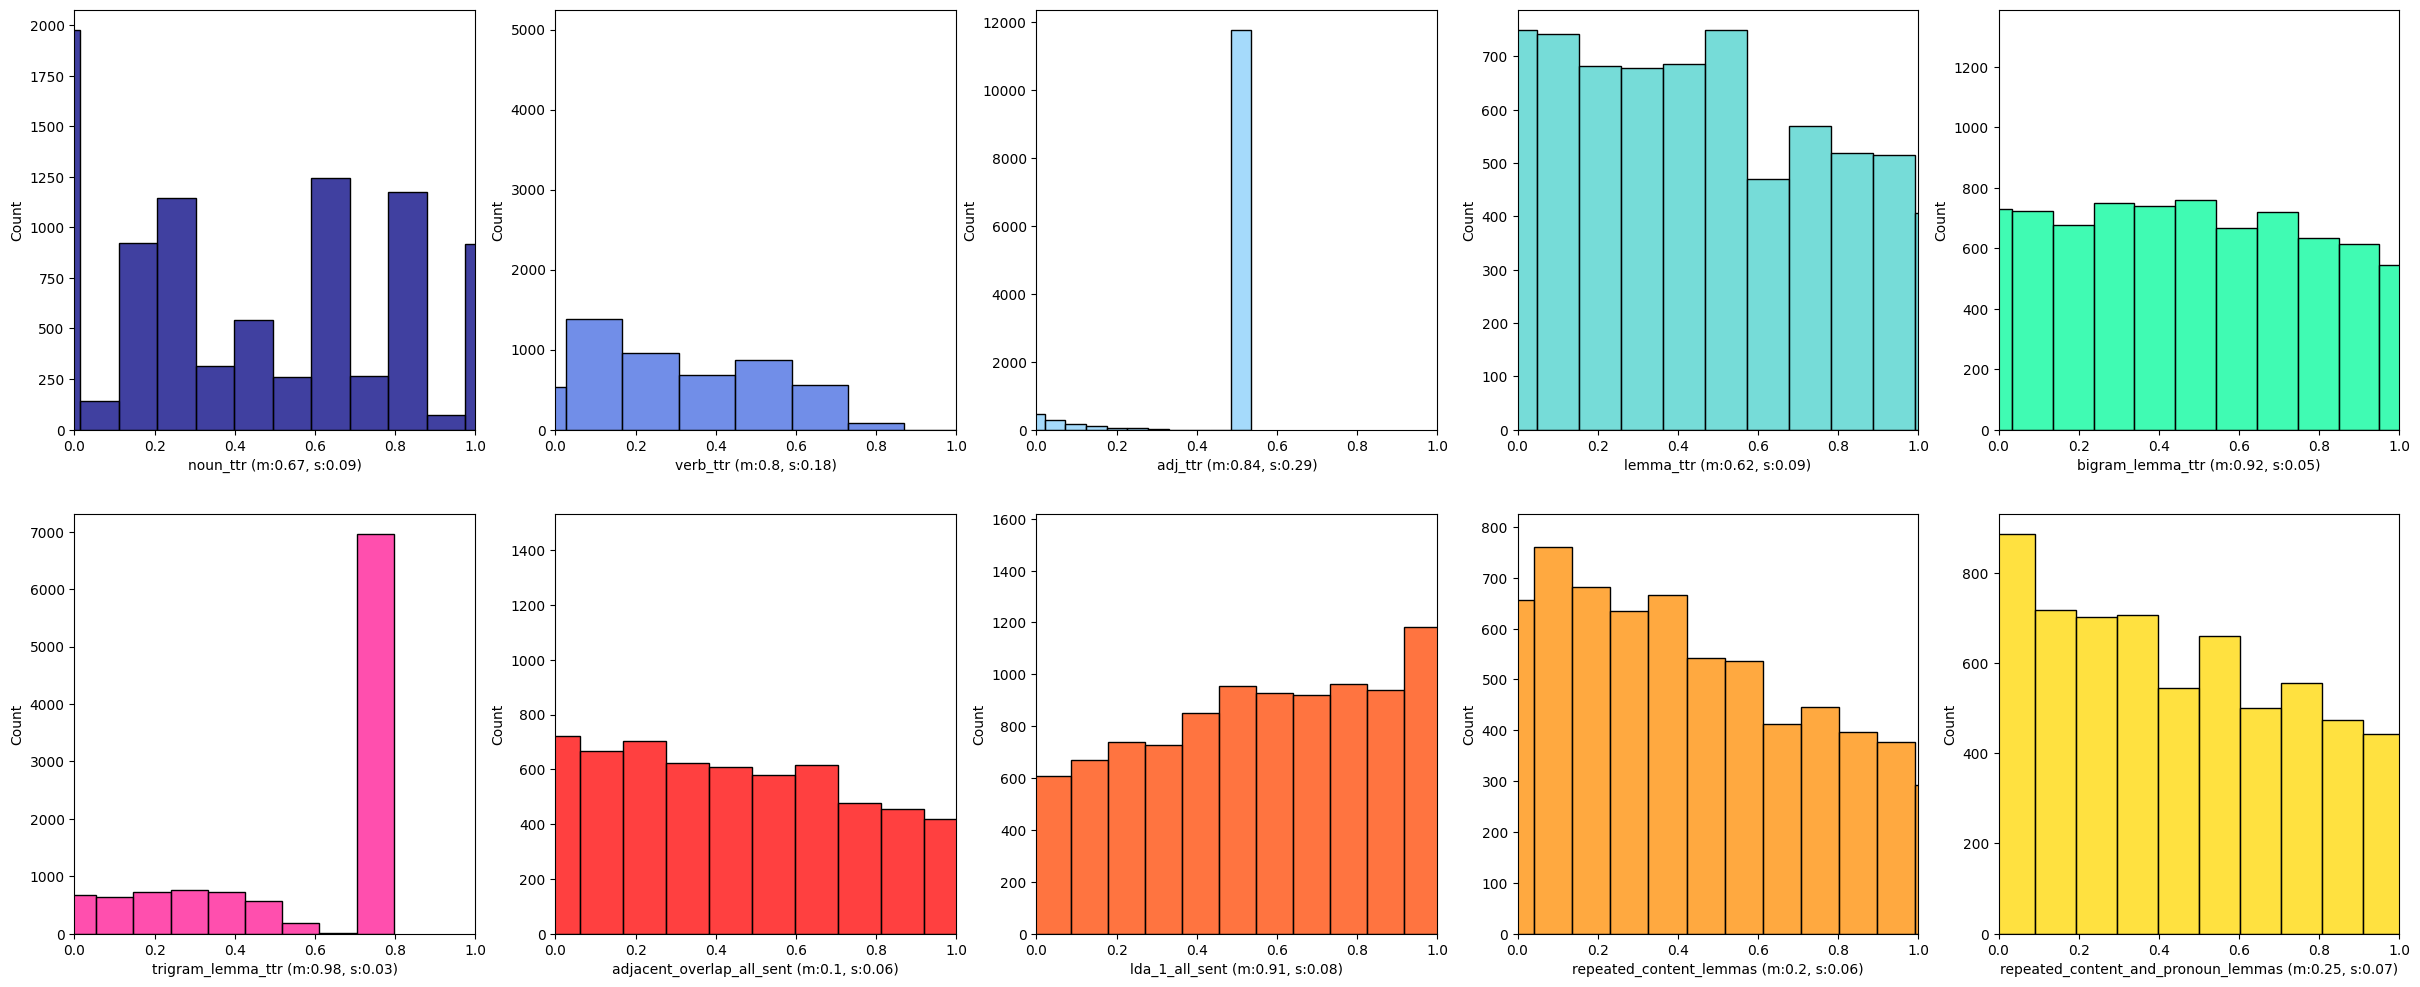

In [133]:
colors = ['navy', 'royalblue', 'lightskyblue', 'mediumturquoise', 'mediumspringgreen', 'deeppink', 'red', 'orangered', 'darkorange', 'gold']

fig, axes = plt.subplots(2, 5, figsize=(30, 12))
i = 0
j = 0
for ind in range(len(keys)):
    if ind == 5:
        i = 1

    axes[i, j].set_xlim(left=0, right=1)
    sns.histplot(metrics[keys[ind]], ax=axes[i, j], color=colors[ind])
    m = np.round(means[keys[ind]],2)
    s = np.round(stds[keys[ind]],2)
    axes[i, j].set_xlabel(f'{keys[ind]} (m:{m}, s:{s})')
    j = (j+1)%5

plt.show()